# Espaços Vetoriais

In [110]:
using Luxor

## Definições

In [111]:
l_diagrama = 300                       # largura do diagrama
a_diagrama = floor(0.85*l_diagrama)    # altura do diagrama

fface = "DejaVu Sans"                  # fontface
fsize = 10                              # fontsize

l_linha = 0.8                          # largura da linha

l_retangulo = floor(l_diagrama / 4)    # largura dos retângulos
a_retangulo = floor(0.4*l_retangulo)   # altura dos retângulos

# ponto âncora: ponto a partir do qual o diagrama é calculado
x = floor(l_diagrama / 4)              # ordenada do ponto âncora
y = floor(0.5*x)                       # abscissa do ponto âncora
ancora = Point(x, y)                   # ponto âncora

sep_vertical = floor((4/5)*x)          # distância vertical entre os níveis das figuras
#

60.0

### Círculos

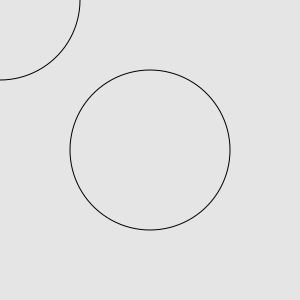

In [112]:
Drawing(300, 300, "circulo.png")

# origin()
setline(1)
background("gray90")
sethue("black")

raio = 80      # raio do círculo
frac = 1/50    # fração de π para particionamento da circunferência: 0 < frac ⩽ 1
# π/4          # 45 graus em radianos

# vetor de radianos para particionamento da circunferência
t = [frac*π*i for i in 1:2/frac + 1]
# (2/frac + 1) = (2π/(frac π) + 1)

# poly([raio*Point(sin(t*frac*π), cos(t*frac*π)) for t in 1:150], :stroke)

# Plotagem do círculo com centro em (0, 0): pontos discretos circularmente dispostos
#   poly: polígono cujos lados ligam os pontos circularmente dispostos;
#   a partir de uma certa quantidade de pontos, tem-se o efeito visual de um círculo
poly(raio*Point.(sin.(t), cos.(t)), :stroke)

# Translação do círculo acima por aplicação do vetor (150, 150):
#   translação dos pontos seguida do desenho do polígono
poly(map(p->Point(150, 150)+p, raio*Point.(sin.(t), cos.(t))), :stroke)

# circle(Point(150, 150), 120, :stroke) # para verificação e controle

finish()
preview()

### Funções de apoio

In [113]:
# raio*Point.(sin.(t), cos.(t))

# definição de ponto com interface "matemática" para y
MPoint = (x, y) -> Point(x, -y)

function show_point(p::Point)
  circle(p, l_diagrama/100, :fill)
end

function show_point(p::Point, raio::Float64)
  circle(p, raio, :fill)
end

# plotagem dos eixos xy, dados os comprimentos sobre x e y
function eixos(dim_x::Number, dim_y::Number)
  setdash("dot")
  line(Point(-dim_x, 0), Point(dim_x, 0), :stroke)
  line(Point(0, -dim_y), Point(0, dim_y), :stroke)
  setdash("solid")
end

# retorna um ponto sobre a circuferência de centro em pt
function pt_sobre_circunferencia(pt::Point, raio::Number, radianos::Float64)::Point
  return raio*Point(sin(radianos), cos(radianos))+pt
end
# pt_sobre_circunferencia(ponto, raio, radianos)

# norma de um vetor
function norma(p::Point)
  return sqrt(p[1]^2 + p[2]^2)
end

# seno do ângulo de um vetor
function sen_theta(p::Point)
  return p[2]/norma(p)
end

# cosseno do ângulo de um vetor
function cos_theta(p::Point)
  return p[1]/norma(p)
end

function produto_por_escalar(escalar::Number, p::Point)
  return Point(escalar*p[1], escalar*p[2])
end

function produto_escalar(p1::Point, p2::Point)::Number
  return p1[1]*p2[1] + p2[2]*p2[2]
end

# o resultado é uma função em t
# ao se atribuir um valor a t, o resultado é um vetor com extremidade sobre a reta p1 p2
function reta_2_pontos(p1::Point, p2::Point)::Function
  return (t)-> p1+(p2-p1)*t
end

# >>> vetores paralelos ao eixo x: a ortogonal não é uma função de x
# >>> P(0, y)
# reta ortogonal à extremidade de um vetor p (com centro na origem)
# o resultado é uma função
# ao se atribuir um valor a t, o resultado é um vetor com centro na origem
function reta_ortogonal(p::Point)::Function
  if p[2] == 0 return t->"Funcão indefinida" end
  return (t)-> p + Point(1, -(p[1]/p[2])) * t
end
# reta_ortogonal(P)
# reta_ortogonal(Point(10,-20))(0.5)

# reta ortogonal à extremidade de um vetor p
# situado na extremidade de um vetor p0
# ou seja: reta ortogonal a p em p0+p
# o resultado é uma função
# ao se atribuir um valor a t, o resultado é um vetor com centro na origem
function reta_ortogonal(p0::Point, p::Point)::Function
  return (t)-> (p + Point(1, -(p[1]/p[2])) * t) + p0
end
# reta_ortogonal(p0, p1)
# reta_ortogonal(p0, p1)(-13)
#

reta_ortogonal (generic function with 2 methods)

### Plotagem de vetores

In [114]:
"Plotagem de um vetor a partir da origem"
function plotVector(pt::Point)
    line(O, pt, :stroke)
    arrow(orig, pt, linewidth=0.5*l_linha, arrowheadangle = pi/7)
end

"Plotagem de um vetor dadas a origem e a extremidade"
function plotVector(pt1::Point, pt2::Point)
    line(pt1, pt2, :stroke)
    arrow(pt1, pt2, linewidth=0.5*l_linha, arrowheadangle = pi/7)
end

plotVector

In [115]:
plotPoint = show_point

show_point (generic function with 2 methods)

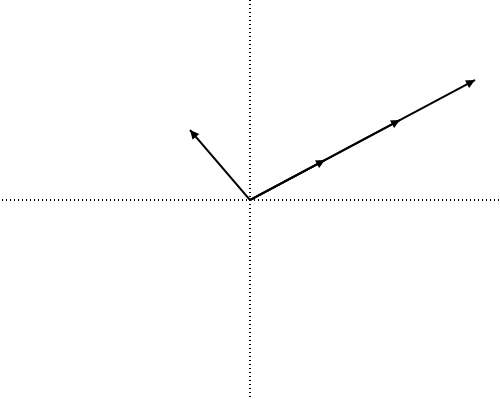

In [116]:
# Drawing(450, 200, "retas.png")
# Drawing(450, 200)
Drawing(500, 400)

origin()
# eixos(180, 150)
eixos(300, 300)
orig = Point(0, 0)

sethue("black")

p0 = MPoint(150, 80) # Point(150,-80)
p1 = MPoint(-60, 70) # Point(-60, -70)

# sethue("green")
p0x = MPoint(150, 0)
# plotVector(p0x)

# plotPoint(p0)
# plotPoint(p1)

plotVector(p0)
# plotVector(1.3*p0) # (MPoint(150*1.3, 30*1.3))
plotVector(1.5*p0) # (escVector(1.5, p0))
plotVector(0.5*p0)
# plotVector(p1, p0+p1)

plotVector(p1)
# plotVector(0.2*p1)

sethue("blue")
# plotVector(p0+p1)

sethue("red")
# plotVector(p1, p0+p1) #
# plotVector(p0, p0+p1)

sethue("green")
# plotVector(p0-p1)
# plotVector(p1, p0) # (p1, p1 + (p0-p1))

finish()
preview()

## Equação da Reta 

### Reta que passa por $p_0$ e é paralela a $t$

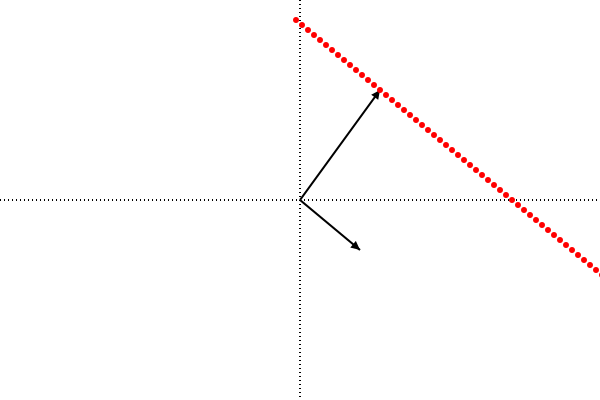

In [117]:
# Plotagem usando Luxor
# Drawing(450, 200, "retas.png")
# Drawing(450, 200)
Drawing(600, 400)

origin()
# eixos(180, 150)
eixos(300, 300)
orig = Point(0, 0)

sethue("black")

p0 = MPoint(80, 110) # Point(150,-80)
t = MPoint(60, -50) # Point(-60, -70)

plotVector(p0)
plotVector(t)

sethue("blue")

# plotVector(p0 + 3*t)
# plotVector(p0, p0 + t) # múltiplos de t sobre a reta

sethue("gray")#("green")

# Plotagem de vetores
# plotVector(p0, p0 - 0.5*t)
# plotVector(p0, p0 + 0.5*t)
# plotVector(p0, p0 + 1*t)
# plotVector(p0, p0 + 1.5*t)
# plotVector(p0, p0 + 2*t)
# plotVector(p0, p0+2.5*t)

#=
plotVector(p0 + 0*t)
plotVector(p0 + t)
plotVector(p0 + 1.5*t)
plotVector(p0 + 2*t)
plotVector(p0 + 2.5*t)
=#

sethue("red")
# Plotagem dos pontos correspondentes

#=
plotPoint(p0+0*t)
plotPoint(p0+1*t)
plotPoint(p0 + 1.5*t)
plotPoint(p0+2*t)
plotPoint(p0+2.5*t)
=#

# Equação da reta que passa por p0 e é paralela a t
p(u) = p0 + u*t

# Exemplo de vetor p(u)
# plotVector(p0+ 3*t)
# plotVector(p(3))

sethue("red")

# Plotagem de vários pontos

for ui in [-1.5+n*0.1 for n in 1:55 ]
   plotPoint(p(ui))
end


finish()
preview()

In [118]:
((0, 0), (9, -3))       (9, -3)

LoadError: syntax: space before "(" not allowed in "((0, 0), (9, -3)) (" at In[118]:1

In [119]:
(5, 2) = 5i + 2j

LoadError: syntax: invalid assignment location "5" around In[119]:1

In [120]:
i = (1, 0); j = (0, 1)

(0, 1)